# Sheet 4

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn

## 1 Learning with pytorch

(a)

In [2]:
x1 = torch.tensor(0.5, requires_grad=True)
x2 = torch.tensor(1.5)

f = x1 / x2
sinf = torch.sin(f)
ex2 = torch.exp(x2)

def loss(a, b):
    return (torch.sin(a / b) + a / b - torch.exp(b)) * (a / b - torch.exp(b))

opt = torch.optim.Adam(params=[x1, x2], lr=0.1)

for i in range(2):
    opt.zero_grad()
    l = loss(a=x1, b=x2)
    
    # Compute gradient only for x1 using torch.autograd.grad
    grad_x1 = torch.autograd.grad(l, x1)[0]
    
    # Update x1
    with torch.no_grad():
        x1 -= 0.1 * grad_x1
    
# Print the final value of x1
print("x1:", x1.item())

x1: 1.8818244934082031


In [25]:
# TODO: manual check of intermediate gradients with torch.autograd.grad
from torch.autograd import grad

x1 = torch.tensor(1.5,requires_grad=True)
x2 = torch.tensor(0.5)

f = x1/x2
sinf = torch.sin(f)
ex2 = torch.exp(x2)

losses = []

def loss(a,b):
    return (torch.sin(a/b)+a/b-torch.exp(b))*(a/b-torch.exp(b))

opt = torch.optim.Adam(params=[x1],lr=0.1)

for _ in range(1000):
    opt.zero_grad()
    l = loss(a = x1, b=x2)
    losses.append(l)
    l.backward()
    opt.step()

print(x1.item())

0.6207267045974731


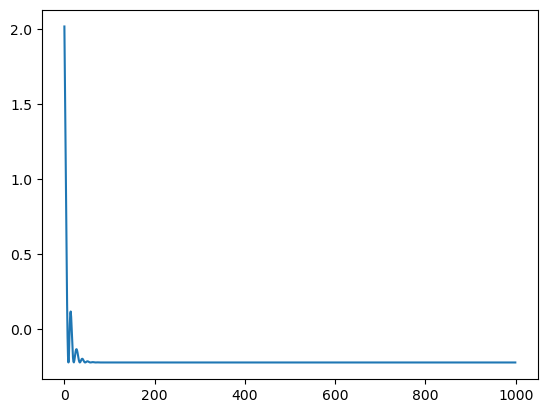

In [26]:
plt.plot([lossval.detach().numpy() for lossval in losses])

In [17]:
x1s = torch.linspace(0,2,100,requires_grad=True) #error w/o req. grad
x2 = torch.tensor(0.5)

losses = loss(x1s,x2)
losses.sum().backward()
#sum because applying backward() on scalar
#backward then still derives each loss by respective x1

dLdx = x1s.grad #associated loss gradients by x1

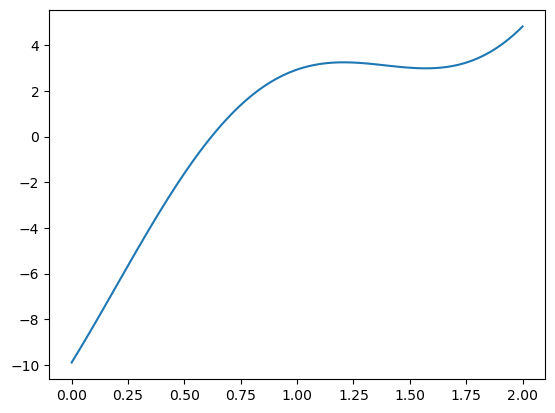

In [20]:
plt.plot(x1s.detach().numpy(),dLdx)

# 2) Amplitude Regression

In [3]:
#%pip install wget


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=92a659740944cdcd2077f380db593cc8f3551e2bc38b5c484d5299d6ebea3466
  Stored in directory: c:\users\kvonb\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [4]:
# download data to folder data04
# this might take some time (50MB)
# you can also do this manually (download + unpack zip)
import os, sys
import wget
from zipfile import ZipFile
from tqdm import tqdm

DESTINATION = "data04"
url = "https://www.thphys.uni-heidelberg.de/~plehn/pics/"
filename = "tutorial-2-data.zip"
url = url + filename

os.makedirs(DESTINATION, exist_ok=True)
os.chdir(DESTINATION)
wget.download(url, filename)
with ZipFile(filename, "r") as zip_ref:
    for file in tqdm(iterable=zip_ref.namelist(), total=len(zip_ref.namelist())):
        zip_ref.extract(member=file)
os.chdir("..")
%ls data04

100%|██████████| 11/11 [00:00<00:00, 14.72it/s]


 Datentr�ger in Laufwerk C: ist TIH0258900B
 Volumeseriennummer: 589B-6F7A

 Verzeichnis von c:\Users\kvonb\Ken\Studium\Vorlesungen\Master\Machine Learning\Programs\data04

16.11.2023  14:03    <DIR>          .
16.11.2023  14:03    <DIR>          ..
16.11.2023  14:03    <DIR>          tutorial-2-data
16.11.2023  14:03        55.093.854 tutorial-2-data.zip
               1 Datei(en),     55.093.854 Bytes
               3 Verzeichnis(se), 50.497.728.512 Bytes frei


In [5]:
# load data
trn_dat = np.load("data04/tutorial-2-data/trn_dat.npy")
trn_amp = np.load("data04/tutorial-2-data/trn_amp.npy")

val_dat = np.load("data04/tutorial-2-data/val_dat.npy")
val_amp = np.load("data04/tutorial-2-data/val_amp.npy")

tst_dat = np.load("data04/tutorial-2-data/tst_dat.npy")
tst_amp = np.load("data04/tutorial-2-data/tst_amp.npy")

print(f"train data shape: {trn_dat.shape}")
print(f"train amp  shape: {trn_amp.shape}")
print(f"test  data shape: {tst_dat.shape}")
print(f"test  amp  shape: {tst_amp.shape}")
print(f"val   data shape: {val_dat.shape}")
print(f"val   amp  shape: {val_amp.shape}")

train data shape: (30000, 5, 4)
train amp  shape: (30000,)
test  data shape: (30000, 5, 4)
test  amp  shape: (30000,)
val   data shape: (30000, 5, 4)
val   amp  shape: (30000,)


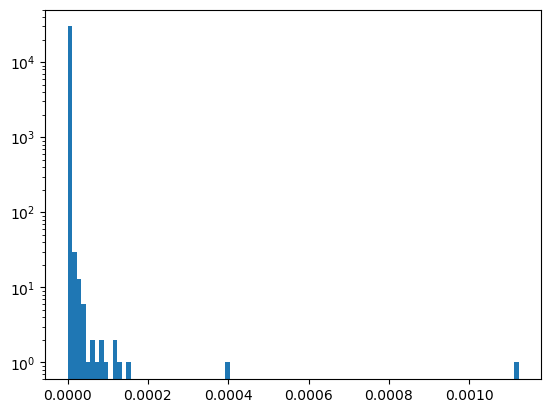

In [9]:
_ = plt.hist(trn_amp,log=True,bins=100)

(a)

In [14]:
# TODO: Plot amplitudes

In [15]:
# TODO: Plot incoming momenta

In [17]:
# TODO: Plot photon pTs

In [16]:
# TODO: Plot MET

(b)

In [14]:
# flatten datasets
nev = trn_dat.shape[0]
trn_datf = np.reshape(trn_dat, (nev, -1))
val_datf = np.reshape(val_dat, (nev, -1))
tst_datf = np.reshape(tst_dat, (nev, -1))

In [15]:
# TODO: Implement preprocessing
def preprocess_x(x_in):
    pass

def preprocess_A(A_in):
    pass

def undo_preprocess_A(A_in):
    pass

In [ ]:
# check that network inputs are O(1)
for i in range(20):
    plt.hist(preprocess_x(trn_datf)[0][:,i], range=(-5,5), alpha=.5, bins=50)
plt.hist(preprocess_A(trn_amp)[0][:,0], range=(-5,5), alpha=.5, bins=50)
plt.show()

In [17]:
# TODO: Implement dataset class
class amp_dataset(torch.utils.data.Dataset):
    
    def __init__(self, data, amp):
        pass

    def __len__(self):
        pass

    def __getitem__(self, idx):
        pass

In [40]:
# TODO: create datasets and dataloaders

trn_dataloader = ...
val_dataloader = ...
tst_dataloader = ...

(c)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

In [42]:
# TODO: Implement network
class amp_net(nn.Module):
    
    def __init__(self, ipt_dim=20, opt_dim=1, hdn_dim=32, n_layers=2):
        super(amp_net, self).__init__()
        
        pass

    def forward(self, x):
        pass

In [ ]:
# TODO: create network
model = ...
print(model)
total_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Model has {total_parameters:d} trainable parameters")

In [ ]:
# take first batch from train loader
x, A = next(iter(trn_dataloader))
print(x.shape, A.shape)

In [9]:
# TODO: Train network on first batch for 10000 iterations

In [10]:
# TODO: Plot loss

In [13]:
# TODO: Plot (A_predicted - A_true) / A_true

(d)

In [11]:
# TODO: Train network on the full training dataset

In [12]:
# TODO: Plot loss and amplitude histogram

(e)

In [59]:
# TODO: create dataloaders with reduced dataset

batch_size = 64
trn_dataloader_reduced = ...
val_dataloader_reduced = ...
tst_dataloader_reduced = ...

In [ ]:
# TODO: Train model on reduced dataset

In [ ]:
# TODO: Evaluate model

In [ ]:
# TODO: Implement your regularization approach, train a model and evaluate it